# flood

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
from edt import edt

ps.visualization.set_mpl_style()

## Create image and variables

0it [00:00, ?it/s]

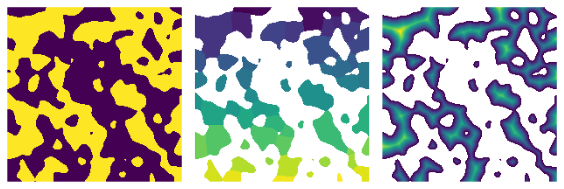

In [2]:
im = ps.generators.blobs(shape=[200, 200])
regions = ps.filters.snow_partitioning(im, r_max=4, sigma=0.4)
dt = edt(im)

fig, ax = plt.subplots(1, 3, figsize=[8, 4])
ax[0].axis(False)
ax[0].imshow(im)
ax[1].axis(False)
ax[1].imshow(regions.regions/im)
ax[2].axis(False)
ax[2].imshow(dt/im);

## Apply filter

### mode
The mode indicates how the values from ``im`` are interpreted. The following shows the results of each support option:

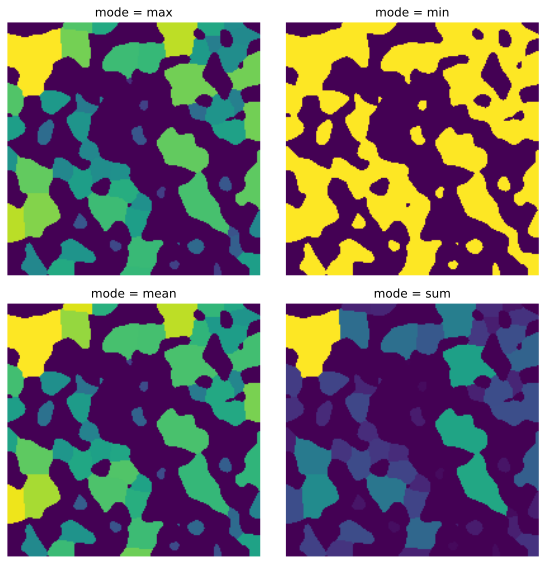

In [3]:
region_max = ps.filters.flood(im=dt, labels=regions.regions, mode='max')
region_min = ps.filters.flood(im=dt, labels=regions.regions, mode='min')
region_ave = ps.filters.flood(im=dt, labels=regions.regions, mode='mean')
region_size = ps.filters.flood(im=im, labels=regions.regions, mode='sum')

fig, ax = plt.subplots(2, 2, figsize=[8, 8])
ax[0][0].imshow(region_max)
ax[0][0].axis(False)
ax[0][0].set_title('mode = max')
ax[0][1].imshow(region_min)
ax[0][1].axis(False)
ax[0][1].set_title('mode = min')
ax[1][0].imshow(region_ave)
ax[1][0].axis(False)
ax[1][0].set_title('mode = mean')
ax[1][1].imshow(region_size)
ax[1][1].axis(False)
ax[1][1].set_title('mode = sum');